In [2]:
import numpy as np

from flask import Flask, jsonify

import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base

%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt


In [3]:
# Create Database Connection
engine = create_engine("postgresql://localhost:5432/EmployeeSQL")

# Establish Connection
connection = engine.connect()

In [4]:
# Create tables within the database
Base = declarative_base()
conn = engine.connect()
Base.metadata.create_all(conn)

In [5]:
# To push the objects made and query the server we use a Session object
session = Session(bind=engine)

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['Departments', 'Employees', 'Dpt_Emp', 'Dpt_Manager', 'Salaries', 'Titles']

In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Salaries = Base.classes.Salaries

In [8]:
# Query Salaries for salary and save the query into results
salary_results = session.query(Salaries.salary).order_by(Salaries.salary.desc()).statement
df = pd.read_sql_query(salary_results, session.bind)
df.head()


,salary
0,129492
1,127238
2,127041
3,126703
4,125469


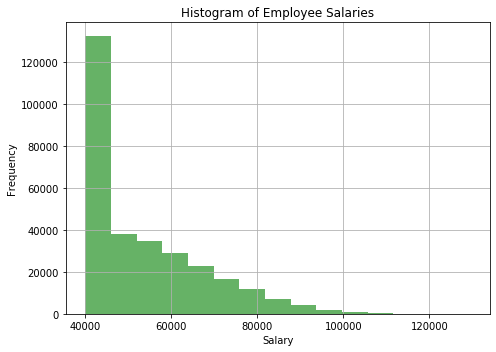

In [9]:
# Create a histogram to visualize the most common salary ranges for employees.
fig, ax = plt.subplots(figsize=(7, 5))

# the histogram of the data
n, bins, patches = plt.hist(df["salary"], 15, facecolor='green', alpha=0.6)
 
# Set a Title and labels
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Salaries')

#Set a grid on the plot
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Histogram of Employee Salaries.png")

# Show the figure
plt.show()


In [10]:
# Reflect Database into ORM class
Titles = Base.classes.Titles

In [11]:
# Query average salaries by title
avg_salary_title = session.query(Titles.title, func.avg(Salaries.salary)).\
                    filter(Salaries.emp_no == Titles.emp_no).\
                    group_by(Titles.title).\
                    order_by(func.avg(Salaries.salary).desc()).statement

avg_salary_title_df = pd.read_sql_query(avg_salary_title, session.bind)
avg_salary_title_df.head(10)


,title,avg_1
0,Senior Staff,58503.286614
1,Staff,58465.271904
2,Manager,51531.041667
3,Technique Leader,48580.505772
4,Engineer,48539.781423
5,Senior Engineer,48506.751806
6,Assistant Engineer,48493.204786


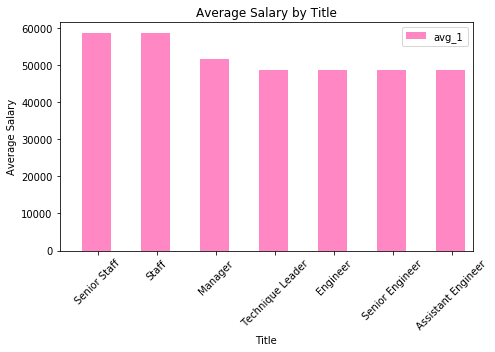

In [18]:
#Create a bar chart of average salary by title.
avg_salary_title = avg_salary_title_df.plot.bar(color='hotpink', alpha=0.8, align="edge", figsize=(7, 5))

# Set a Title and labels
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")

# Set x axis and tick locations
x_axis = np.arange(len(avg_salary_title_df))
tick_title = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels 
plt.xticks(tick_title, avg_salary_title_df["title"], rotation=45)

plt.tight_layout()

# Save the Figure
plt.savefig("Average Salary by Title")

# Show the figure
plt.show()


In [ ]:
;lekfjg;lskfjg;lsdkfjgs;ldkfjgs;lkgjsd